In [3]:
%matplotlib notebook

"""
Simple linear regression model, uses stock data from Quandl, from Sentdex ML tutorials.
Original source : https://www.youtube.com/watch?v=r4mwkS2T9aI&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=5&t=0s
"""

"""Trains linear regression model but how will we use this model to make predictions?"""

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import quandl
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import pickle

from sklearn import preprocessing, svm
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [4]:
style.use("ggplot")

df = quandl.get("WIKI/GOOGL")

In [5]:
for column in df.columns:
    print(column)
print(df[["Adj. Open",]])
print(df)

Open
High
Low
Close
Volume
Ex-Dividend
Split Ratio
Adj. Open
Adj. High
Adj. Low
Adj. Close
Adj. Volume
              Adj. Open
Date                   
2004-08-19    50.159839
2004-08-20    50.661387
2004-08-23    55.551482
2004-08-24    55.792225
2004-08-25    52.542193
...                 ...
2018-03-21  1092.570000
2018-03-22  1080.010000
2018-03-23  1051.370000
2018-03-26  1050.600000
2018-03-27  1063.900000

[3424 rows x 1 columns]
               Open     High      Low     Close      Volume  Ex-Dividend  \
Date                                                                       
2004-08-19   100.01   104.06    95.96   100.335  44659000.0          0.0   
2004-08-20   101.01   109.08   100.50   108.310  22834300.0          0.0   
2004-08-23   110.76   113.48   109.05   109.400  18256100.0          0.0   
2004-08-24   111.24   111.60   103.57   104.870  15247300.0          0.0   
2004-08-25   104.76   108.00   103.88   106.000   9188600.0          0.0   
...             ...      ...

In [6]:
#adjust df columns so that we will use only useful columns

df = df[["Adj. Open", "Adj. High","Adj. Low","Adj. Close","Adj. Volume"]]
df["HL_PCT"] = df["Adj. High"] - df["Adj. Close"] / df["Adj. Close"] * 100
df["PCT_change"] = df ["Adj. Close"] - df["Adj. Open"] / df["Adj. Open"] * 100

df = df[["Adj. Close", "PCT_change", "HL_PCT", "Adj. Volume"]]

#control print(len(df))

In [7]:
#fill the Nans with -99999
forecast_col = "Adj. Close"
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df))) #shift columns upward by %1
df["label"] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True) #drop NaN valued columns

In [8]:

"""ind = pd.date_range("1/1/2019", periods = 3, freq = "24H")
df2 = pd.DataFrame({"A" : [1,2,3],
     "B" : [4,5,6],
     "C" : [7,8,9],},
                  index = ind)
print(df2)"""

'ind = pd.date_range("1/1/2019", periods = 3, freq = "24H")\ndf2 = pd.DataFrame({"A" : [1,2,3],\n     "B" : [4,5,6],\n     "C" : [7,8,9],},\n                  index = ind)\nprint(df2)'

In [9]:
X = np.array(df.drop(["label"], axis=1))
X = preprocessing.scale(X)

X = X[:-forecast_out]
X_predict = X[-forecast_out:]
y = np.array(df["label"])
y = y[:-forecast_out]
print(y.shape,X.shape)

(3354,) (3354, 4)


In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train) #train model with X_train and y_train
with open("linear_regression.pickle", "wb") as f:
    pickle.dump(clf,f)
    
pickle_in = open("linear_regression.pickle", "rb")
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test) #find accuracy on test set
forecast_set = clf.predict(X_predict) # predict
df["Forecast"] = np.nan

In [11]:
last_date = df.iloc[-1].name #name method gives tag of column # iloc is to acces row by integer loc
last_unix = last_date.timestamp()
oneday = 24*60*60
next_unix = last_unix + oneday

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += oneday
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] #loc is to acces column by name

<IPython.core.display.Javascript object>


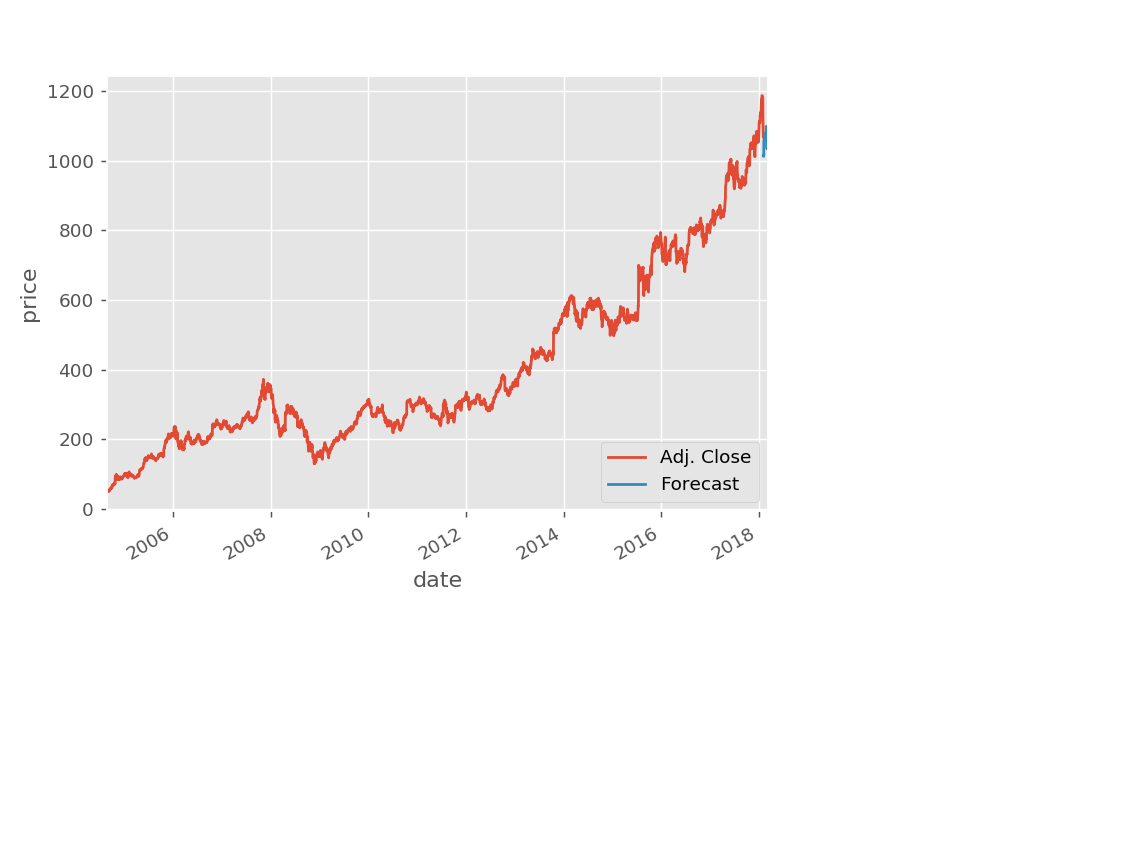

In [12]:
df["Adj. Close"].plot()
df["Forecast"].plot()
plt.legend(loc=4)
plt.xlabel("date")
plt.ylabel("price")
plt.show()

In [15]:
a = np.array([1,2,3])
b = np.array([1,2,3])
print(a*b)

[1 4 9]
